# 1. Introduction

In [12]:
#See seminar paper

# 2. Worrisome Properties of High-Dimensional Data

In [13]:
# Creating synthetic data

In [22]:
#Our population
set.seed(24) #This function allows to use randomly generated numbers, which remain consistent througout our usage. 
N<-1000000 #Number of elements in the population
d<-c(rnorm(N,100,10))#d indicates our treatment
x_1<-c(1:N) #x_1 is a covariate
x_2<-rnorm(N,20,40)+17*d #x_2 is a covariat, which is strongly correlated with d
y<-d+x_1+0.01*x_2+rnorm(N,1,0.8) #This is the true relationship


In [23]:
#Our population is characterized by further explaining variables
x_3<-c(5+runif(N,20,40)+7.3^0.47)
x_4<-c(x_2*rexp(N,7))
x_5<-c(rnorm(N,14,3))
x_6<-c(rgamma(N,3)+17)
x_7<-c(5+rweibull(N,4,1))
x_8<-c(rnorm(N,73,17)+rgamma(N,6))
x_9<-c(rweibull(N,0.4,0.8))
x_10<-c(0.05*d+7-rgamma(N,7.4))
x_11<-c(rpois(N,0.7)+0.5*x_3)
x_12<-c(rnorm(N,22,18))
x_13<-c(rpois(N,1)+rweibull(N,0.2))
x_14<-c(rnorm(N,10,5)+runif(N,-3,+3))
x_15<-c(x_3*x_7+rweibull(N,0.9))
x_16<-c(rnorm(N,7,7))
x_17<-c(66+rpois(N,5))
x_18<-c(0.7*x_15+rgamma(N,17))
x_19<-c(runif(N,-80,50))
x_20<-c(rpois(N,0.03))
x_21<-c(rpois(N,2))
x_22<-c(x_5*x_6+runif(N,-3,3))
x_23<-c(rweibull(N,0.59,20))
x_24<-c(rnorm(N,5,2)+324-rpois(N,5))
x_25<-c(x_2*0.1+rnorm(N,2,3)+x_7)
x_26<-c(rcauchy(N,2)+7)
x_27<-c(rcauchy(N,6)+rnorm(N,5)+x_19)
x_28<-c(rcauchy(N,3)+rpois(N,3)+7)
x_29<-c(rnorm(N,66,15)+x_15*x_16*0.02)
x_30<-c(rweibull(N,4,1)+17-x_4*0.4)
x_31<-c(rpois(N,7)+runif(N,3,5))

In [24]:
#All variables of the population are saved in data frame 
data_frame<-data.frame(y,d,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30,x_31)

In [17]:
# Regression of the true model (using the whole population as sample)

In [18]:
population_regression<-lm(y~d+x_1+x_2)
summary(population_regression)


Call:
lm(formula = y ~ d + x_1 + x_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6589 -0.5386 -0.0007  0.5381  3.6828 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 1.006e+00  8.142e-03 1.236e+02   <2e-16 ***
d           1.000e+00  3.482e-04 2.873e+03   <2e-16 ***
x_1         1.000e+00  2.768e-09 3.613e+08   <2e-16 ***
x_2         9.984e-03  1.995e-05 5.005e+02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.799 on 999996 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.352e+16 on 3 and 999996 DF,  p-value: < 2.2e-16


In [19]:
#Finding: The regression produce quite pecise estimators for the true coefficients

# 2.1 Increased Standard Errors

In [20]:
#We select 100 observations as a sample and save them in data_frame_smpl
selected_rows_smpl<-sample(nrow(data_frame),100) 
data_frame_smpl<-data_frame[selected_rows_smpl, ]

In [21]:
#In a first step, we conduct a regression using only three (true) regressors

In [423]:
regression_few_regressors<-lm(y~d+x_1+x_2,data=data_frame_smpl)

In [380]:
summary(regression_few_regressors)


Call:
lm(formula = y ~ d + x_1 + x_2, data = data_frame_smpl)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.30620 -0.47993 -0.05383  0.48601  1.66813 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 1.376e+00  8.023e-01 1.715e+00   0.0896 .  
d           9.850e-01  3.543e-02 2.780e+01  < 2e-16 ***
x_1         1.000e+00  2.894e-07 3.455e+06  < 2e-16 ***
x_2         1.060e-02  1.937e-03 5.476e+00 3.49e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8168 on 96 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 4.069e+12 on 3 and 96 DF,  p-value: < 2.2e-16


In [381]:
#In a second step, we conduct a regression using 32 regressors

In [382]:
regression_many_regressors<-lm(y~d+x_1+x_2+x_3+x_4+x_5+x_6+x_7+x_8+x_9+x_10+x_11+x_12+x_13+x_14+x_15+x_16+x_17+x_18+x_19+x_20+x_21+x_22+x_23+x_24+x_25+x_26+x_27+x_28+x_29+x_30+x_31,data=data_frame_smpl)

In [383]:
summary(regression_many_regressors)


Call:
lm(formula = y ~ d + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + 
    x_8 + x_9 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + 
    x_17 + x_18 + x_19 + x_20 + x_21 + x_22 + x_23 + x_24 + x_25 + 
    x_26 + x_27 + x_28 + x_29 + x_30 + x_31, data = data_frame_smpl)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.29829 -0.42011 -0.04878  0.45031  1.75214 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept) -9.442e+00  2.503e+01 -3.770e-01 0.707178    
d            9.432e-01  4.839e-02  1.949e+01  < 2e-16 ***
x_1          1.000e+00  3.608e-07  2.772e+06  < 2e-16 ***
x_2          1.906e-02  4.785e-03  3.984e+00 0.000168 ***
x_3          1.244e-01  3.277e-01  3.790e-01 0.705512    
x_4          9.960e-02  1.697e-01  5.870e-01 0.559115    
x_5         -2.586e-01  3.720e-01 -6.950e-01 0.489438    
x_6         -1.897e-01  2.666e-01 -7.120e-01 0.479182    
x_7          1.163e+00  2.093e+00  5.560e-01

In [385]:
#Result: The standard error of alpha0, the coefficient of d, increases.

In [386]:
#This leads the t-value to decrease. 

In [387]:
#We use the stargazer package in order to generate a table of our findings

In [388]:
install.packages("stargazer")


The downloaded binary packages are in
	/var/folders/81/prx5h13144gcc7v9m0gcd3c80000gn/T//RtmpxkzoD0/downloaded_packages


In [389]:
library("stargazer")

In [390]:
stargazer(regression_few_regressors, regression_many_regressors, title="Comparision of a model with few and many regressors", align=TRUE)


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Wed, Nov 03, 2021 - 20:43:32
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Comparision of a model with few and many regressors} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{2}{c}{\textit{Dependent variable:}} \\ 
\cline{2-3} 
\\[-1.8ex] & \multicolumn{2}{c}{y} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)}\\ 
\hline \\[-1.8ex] 
 d & 0.985^{***} & 0.943^{***} \\ 
  & (0.035) & (0.048) \\ 
  & & \\ 
 x\_1 & 1.000^{***} & 1.000^{***} \\ 
  & (0.00000) & (0.00000) \\ 
  & & \\ 
 x\_2 & 0.011^{***} & 0.019^{***} \\ 
  & (0.002) & (0.005) \\ 
  & & \\ 
 x\_3 &  & 0.124 \\ 
  &  & (0.328) \\ 
  & & \\ 
 x\_4 &  & 0.100 \\ 
  &  & (0.170) \\ 
  & & \\ 
 x\_5 &  & -0.259 \\ 
  &  & (0.372) \\ 
  & & \\ 
 x\_6 &  & -0.190 \\ 
  &  & (0

In [391]:
#Wooldridge (2018) provides on p.94 an indirect explanation, why standard errors increase, if more variables are added to the model. 

In [392]:
#Now we regress d on x_1 and x_2

In [393]:
regression_wool_form_small_model<-lm(d~x_1+x_2)

In [394]:
summary(regression_wool_form_small_model)


Call:
lm(formula = d ~ x_1 + x_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7044  -1.5439   0.0007   1.5473  11.4756 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  4.082e+00  2.303e-02  177.290   <2e-16 ***
x_1         -8.036e-09  7.949e-09   -1.011    0.312    
x_2          5.577e-02  1.312e-05 4250.242   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.295 on 999997 degrees of freedom
Multiple R-squared:  0.9475,	Adjusted R-squared:  0.9475 
F-statistic: 9.032e+06 on 2 and 999997 DF,  p-value: < 2.2e-16


In [395]:
#Analogously we regress d on x_1,...,x-32

In [396]:
regression_wool_form_large_model<-lm(d~x_1+x_2+x_3+x_4+x_5+x_6+x_7+x_8+x_9+x_10+x_11+x_12+x_13+x_14+x_15+x_16+x_17+x_18+x_19+x_20+x_21+x_22+x_23+x_24+x_25+x_26+x_27+x_28+x_29+x_30+x_31,data=data_frame_smpl)

In [397]:
summary(regression_wool_form_large_model)


Call:
lm(formula = d ~ x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + 
    x_9 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + 
    x_18 + x_19 + x_20 + x_21 + x_22 + x_23 + x_24 + x_25 + x_26 + 
    x_27 + x_28 + x_29 + x_30 + x_31, data = data_frame_smpl)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9578 -0.9678 -0.1458  0.8325  5.8328 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.022e+02  5.732e+01  -3.529 0.000748 ***
x_1         -5.976e-07  8.948e-07  -0.668 0.506453    
x_2          4.758e-02  1.044e-02   4.559 2.17e-05 ***
x_3          2.220e+00  7.703e-01   2.882 0.005268 ** 
x_4          2.896e-01  4.207e-01   0.689 0.493422    
x_5          8.622e-01  9.197e-01   0.937 0.351779    
x_6          5.658e-01  6.598e-01   0.858 0.394121    
x_7          1.644e+01  4.815e+00   3.414 0.001076 ** 
x_8          1.080e-02  1.312e-02   0.823 0.413229    
x_9         -2.195e-02  4.435e

In [398]:
#We find that R^2 of the regression of d increases, once more variables are part of the model

In [ ]:
#This leads to an increased standard error of alpha0

# 2.2  Imprecise Predictions

In [ ]:
#See seminar paper

# 3. LASSO

# 3.1 The Need for Dimension Reduction in High-Dimensional Settings

In [106]:
#See seminar paper. 

# 3.2 LASSO as a Model Selection Technique

In [25]:
install.packages("glmnet") #In order to use LASSO the package glmnet is necessary


The downloaded binary packages are in
	/var/folders/81/prx5h13144gcc7v9m0gcd3c80000gn/T//Rtmp4mRgw7/downloaded_packages


In [37]:
library("glmnet") #The package glmnet is loaded

In [38]:
regressand_lasso<-data_frame[,1] #We specify the regressand, while using the whole population

In [39]:
regressors_lasso<-data_frame[,-1] #We specify the regressors, while using the whole population

In [53]:
#The penalty term helps us to force d into the model. This is necessary, as we are generally interested in the coefficient alpha0

In [ ]:
#The leading 0, ensures that the coefficient of d is not punished at all

In [40]:
penalty<-c(0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)

In [54]:
#We calculate the model using glmnet

In [60]:
fit<-glmnet(regressors_lasso,regressand_lasso,penalty.factor=penalty)

In [61]:
#We try to find the optimal lambda, by conducting a 10-fold cross-validation

In [62]:
lambda<-cv.glmnet(as.matrix(regressors_lasso),as.matrix(regressand_lasso))

In [63]:
lambda$lambda.min

[1] 8415.034

In [64]:
#In the last step of our application of LASSO, we display the coefficients based on LASSO

In [65]:
coef(fit,lambda$lambda.min)

33 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept) 1.497007e+04
d           1.935983e+00
x_1         9.699091e-01
x_2         .           
x_3         .           
x_4         .           
x_5         .           
x_6         .           
x_7         .           
x_8         .           
x_9         .           
x_10        .           
x_11        .           
x_12        .           
x_13        .           
x_14        .           
x_15        .           
x_16        .           
x_17        .           
x_18        .           
x_19        .           
x_20        .           
x_21        .           
x_22        .           
x_23        .           
x_24        .           
x_25        .           
x_26        .           
x_27        .           
x_28        .           
x_29        .           
x_30        .           
x_31        .           

# 4. Omitted variable bias

In [73]:
regression_lasso_recommend<-lm(y~d+x_1)

In [74]:
summary(regression_lasso_recommend)


Call:
lm(formula = y ~ d + x_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4130 -0.6021 -0.0002  0.6020  4.2445 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 1.215e+00  9.093e-03 1.336e+02   <2e-16 ***
d           1.170e+00  8.917e-05 1.312e+04   <2e-16 ***
x_1         1.000e+00  3.095e-09 3.231e+08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8934 on 999997 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 5.22e+16 on 2 and 999997 DF,  p-value: < 2.2e-16


In [71]:
#See seminar paper

# 5. Post-Double-Selection

# 5.1 Procedure 

In [107]:
#See seminar paper 

# 5.2 Simulation

# Monte-Carlo-Simulation of Post-Double-Selection

In [78]:
#We create a list, where we can save all the alpha_0 values retrieved from the Monte-Carlo-Simulation
alpha0_mc_pds<-list() #alpha0 is the coefficient of interest, mc stands for Monte-Carlo and pds for post-double selection

for(j in 1:100){
    
    
    #We build a sample
    selected_rows_smpl<-sample(nrow(data_frame),30)
    data_frame_smpl<-data_frame[selected_rows_smpl, ]
    
    #We select d to be our depending variable
    regressand_lasso_s1<-data_frame[,2]
    #We select x_1, ..., x_31 to be our regressors. 
    drops <- c("d","y")
    regressors_lasso_s1<-data_frame[, !(names(data_frame) %in% drops)]
    
    #The structure of the penalty indicates, that we do not force LASSO to include certain variables
    penalty_s1<-c(1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
    
    #We perform LASSO using the minimum value for lambda
    fit_s1<-glmnet(regressors_lasso_s1^2,regressand_lasso_s1, family="gaussian", penalty.factor=penalty_s1)
    lambda_s1<-cv.glmnet(as.matrix(regressors_lasso_s1),as.matrix(regressand_lasso_s1)) #Lambda is found via cross-validation and minimizing the MSPE
    coef(fit_s1,lambda_s1$lambda.min)
    selected_coeffs_s1<-list()
    
    #We have retrieved the information, what covariates to include in a regression (based on step1)
    #We now save them in a list
    
    coef_matrix_s1<-as.matrix(coef(fit_s1,lambda_s1$lambda.min))
    selected_coeffs_s1<-list()
    for (row in 1:nrow(coef_matrix_s1)){
    
        if(coef_matrix_s1[row,1]!=0){
        selected_coeffs_s1[[row]]<-rownames(coef_matrix_s1)[row]
            }
    }   
    
    #Step 2
    
    #We select y as the dependent variable
    regressand_lasso_smpl<-data_frame_smpl[,1]
    #We select d,x_1,..., x_31 as the independet variables
    regressors_lasso_smpl<-data_frame_smpl[,-1]
    
    
    #We create the penalty in a way, that d is always part of the sample
    penalty<-c(0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
    
    #We perform lasso using a minimum value for lambda
    fit_smpl<-glmnet(regressors_lasso_smpl,regressand_lasso_smpl,family="gaussian",penalty.factor=penalty)
    lambda_smpl<-cv.glmnet(as.matrix(regressors_lasso_smpl),as.matrix(regressand_lasso_smpl))
    coef_matrix_s2<-as.matrix(coef(fit_smpl,lambda_smpl$lambda.min))
    
    #We retrieve the coefficients that matter for predicting y and save them in a list
    
    selected_coeffs<-list()
    for (row in 1:nrow(coef_matrix_s2)){
        if(coef_matrix_s2[row,1]!=0){
        selected_coeffs[[row]]<-rownames(coef_matrix_s2)[row]
        }    
    }
    
    coeffs_s1_s2<-append(selected_coeffs_s1, selected_coeffs)
    
    final_coeffs<-coeffs_s1_s2[!duplicated(coeffs_s1_s2)] #Remove duplicates
    
    tmp_reg_str_smpl<-"regression_post_lasso_smpl<-lm(y ~ d"
for (coefficient in final_coeffs){
    if(all(!is.null(coefficient),!as.character(coefficient)=="(Intercept)",!as.character(coefficient)=="d")){
        tmp_reg_str_smpl<-paste(tmp_reg_str_smpl,"+",coefficient)

    }
    
                                    }
    #Step 3 - Conduct a regression based on all identified regressors.
fin_reg_str_smpl<-paste(tmp_reg_str_smpl,",data=data_frame_smpl)")
regression_post_lasso_smpl<-eval(parse(text=fin_reg_str_smpl))
eval(parse(text=gsub(" ","",paste("alpha0_obs",j,"<-regression_post_lasso_smpl$coefficients[2]"))))
eval(parse(text=gsub(" ","",paste("alpha0_mc_pds[[j]]<-alpha0_obs",j))))
}

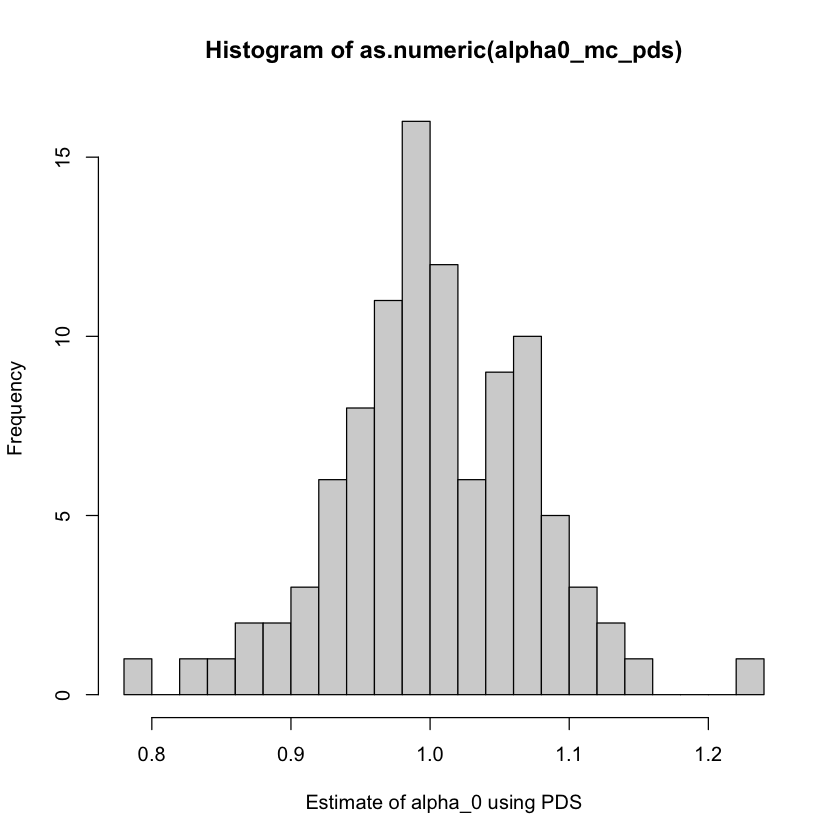

In [85]:
hist(as.numeric(alpha0_mc_pds),breaks=20,xlab="Estimate of alpha_0 using PDS")

In [102]:
mean(as.numeric(alpha0_mc_pds))

[1] 1.003069

# Monte-Carlo-Simulation of Post-Single Selection

In [230]:
#Now we start with the Monte-Carlo-Simulation

In [87]:
#We create a list, where we can save all the alpha_0 values retrieved from the Monte-Carlo-Simulation
alpha0_mc_pss<-list()

for(j in 1:100){
        
    selected_rows_smpl<-sample(nrow(data_frame),30)
    data_frame_smpl<-data_frame[selected_rows_smpl, ]
    
    #We define the input vor LASSO
    regressand_lasso_smpl<-data_frame_smpl[,1]
    regressors_lasso_smpl<-data_frame_smpl[,-1]
    #We define a penalty term for LASSO and specifiy, that d needs to included in any case
    
    penalty<-c(0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1)
    fit_smpl<-glmnet(regressors_lasso_smpl,regressand_lasso_smpl,family="gaussian",penalty.factor=penalty)
    
    #We perform a cross-validation to determine the optimal value of lambda (minimizing MSPE)
    lambda_smpl<-cv.glmnet(as.matrix(regressors_lasso_smpl),as.matrix(regressand_lasso_smpl))
    coef_matrix_smpl<-as.matrix(coef(fit_smpl,lambda_smpl$lambda.min))
       
    #We retrieve the coefficients that matter for predicting y and save them in a list
    
    selected_coeffs<-list()
    for (row in 1:nrow(coef_matrix_smpl)){
        if(coef_matrix_smpl[row,1]!=0){
        selected_coeffs[[row]]<-rownames(coef_matrix_smpl)[row]
        }    
    }
    
    #We build the final regression model as a string 
    tmp_reg_str_smpl<-"regression_post_lasso_smpl<-lm(y ~ d"
for (coefficient in selected_coeffs){
    if(all(!is.null(coefficient),!as.character(coefficient)=="(Intercept)",!as.character(coefficient)=="d")){
        tmp_reg_str_smpl<-paste(tmp_reg_str_smpl,"+",coefficient)

    }
    
                                    }
fin_reg_str_smpl<-paste(tmp_reg_str_smpl,",data=data_frame_smpl)")
    
    #Step 3:
    #We evaluate the string of the final regression model as an expression
regression_post_lasso_smpl<-eval(parse(text=fin_reg_str_smpl))
eval(parse(text=gsub(" ","",paste("alpha0_obs",j,"<-regression_post_lasso_smpl$coefficients[2]"))))
    
eval(parse(text=gsub(" ","",paste("alpha0_mc_pss[[j]]<-alpha0_obs",j))))
}

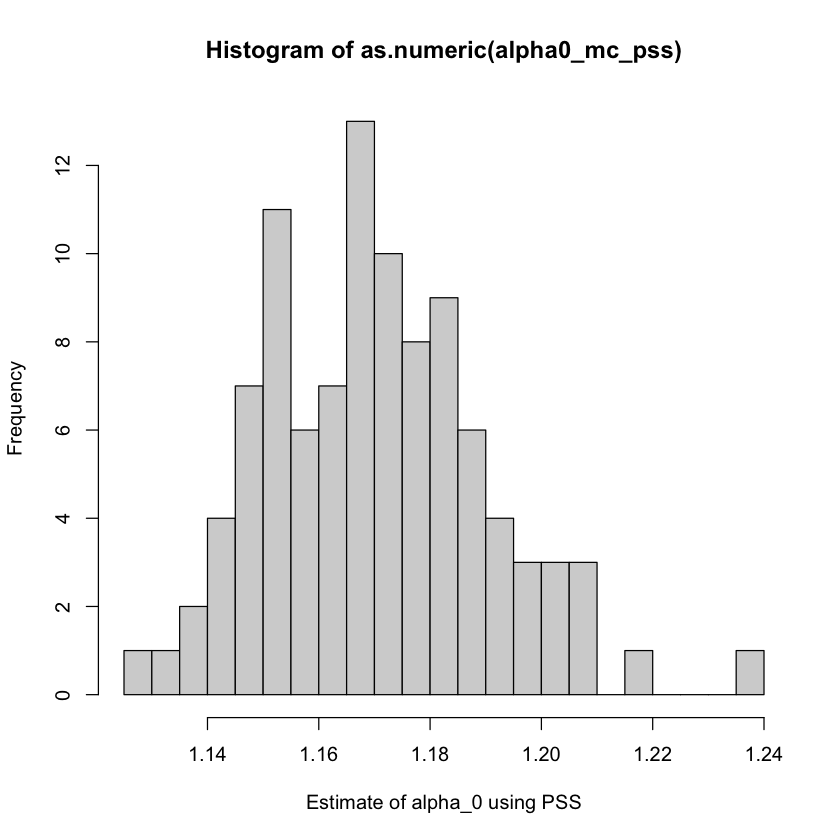

In [103]:
hist(as.numeric(alpha0_mc_pss),breaks=20,xlab="Estimate of alpha_0 using PSS")

In [104]:
mean(as.numeric(alpha0_mc_pss))

[1] 1.170476

# 6. Application of PDS on Dale and Krueger (2002)

In [92]:
#See seminar paper

# 7. Conclusion

In [ ]:
#See seminar paper